# Observations and Analysis
1. Givan that the correlation is .84, this is an indication that there is a position correlation between average tumor and weight. 
2. Out of all the drugs from the study, capomulin and ramicane had the most data points. They were also the most successful in reducing the size of the tumor in mice. 


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [21]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


In [22]:
# Display the data table for preview

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
mouse_count1=len(combined_data["Mouse ID"].unique())
print(f"We have a total of {mouse_count1} mice for this study!") 

We have a total of 249 mice for this study!


In [24]:
#sample dataset for Mouse Metadata table
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [25]:
#sample dataset for Mouse study results table
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse=combined_data[combined_data["Mouse ID"]== 'g989']
all_duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data[combined_data["Mouse ID"].isin(duplicate_mouse) == False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_data["Mouse ID"].unique())
print(f"We have a total of {Mouse_Count} mice for this study!") 

We have a total of 248 mice for this study!


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mr_df=clean_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_data=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance, "Tumor Volume SD": sd, "Tumor Volume SEM": sem})

summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#newthing = merged_df.groupby('Drug Regimen')
summary_data = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_data


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

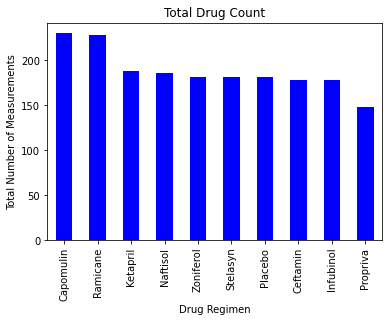

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_measurements=clean_data["Drug Regimen"].value_counts()
y_axis=drug_measurements.values
x_axis=drug_measurements.index

#Need to be DataFrame.plot
drug_measurements.plot(kind="bar", facecolor='blue',)

#Formatting
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

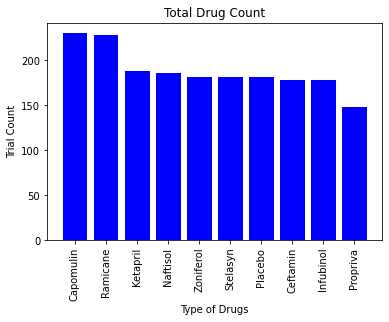

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_measurements=clean_data["Drug Regimen"].value_counts()
plt.bar(drug_measurements.index.values,drug_measurements.values, facecolor='blue',)
 

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()


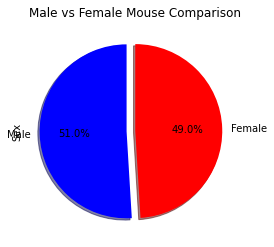

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=clean_data["Sex"].value_counts()
labels=gender_count.index
colors=["blue", "red"]
sizes=gender_count.values
explode=[0.1,0]
gender_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Male vs Female Mouse Comparison")
plt.show()

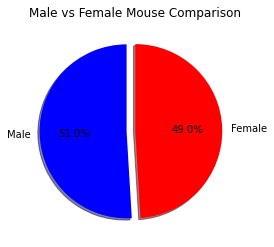

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=clean_data["Sex"].value_counts()
labels=gender_count.index
colors=["blue", "red"]
sizes=gender_count.values
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Male vs Female Mouse Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_count=clean_data.groupby("Mouse ID").max().reset_index()
max_tumor_count

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_list=max_tumor_count[["Mouse ID","Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how='left')
merged_data_list.round(2)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data_list.loc[merged_data_list["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{drugs_list}'s potential outliers: {outliers}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


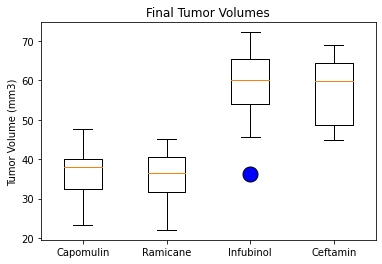

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='blue',markersize=15)
plt.boxplot(tumor_vol_data, labels = drugs_list,flierprops=orange_out)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




## Line and Scatter Plots

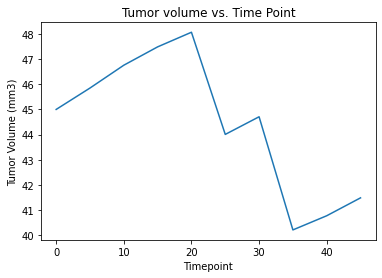

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
apomulin_table= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
mouse= clean_data.loc[clean_data['Mouse ID'] == 'l509']
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs. Time Point")
plt.show()

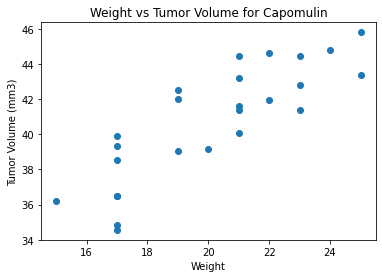

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
volume_weight= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

capomulin_average=volume_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


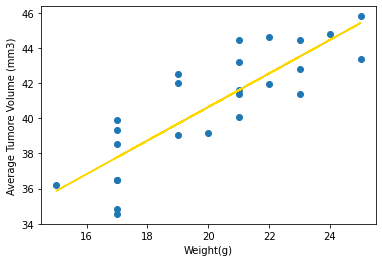

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="gold")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()